# data698 machine learning trial
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

- https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-BSE.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,707.0,707.95,681.0,682.65,683.10,131700.0,910.52
1,2018-09-27,716.8,723.50,691.1,697.80,697.15,156222.0,1104.25
2,2018-09-26,720.0,724.40,709.0,710.00,711.60,71780.0,513.48
3,2018-09-25,725.0,725.00,710.5,715.00,718.15,93181.0,668.03
4,2018-09-24,725.3,728.00,712.0,721.00,721.90,126374.0,911.15


/home/jim/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


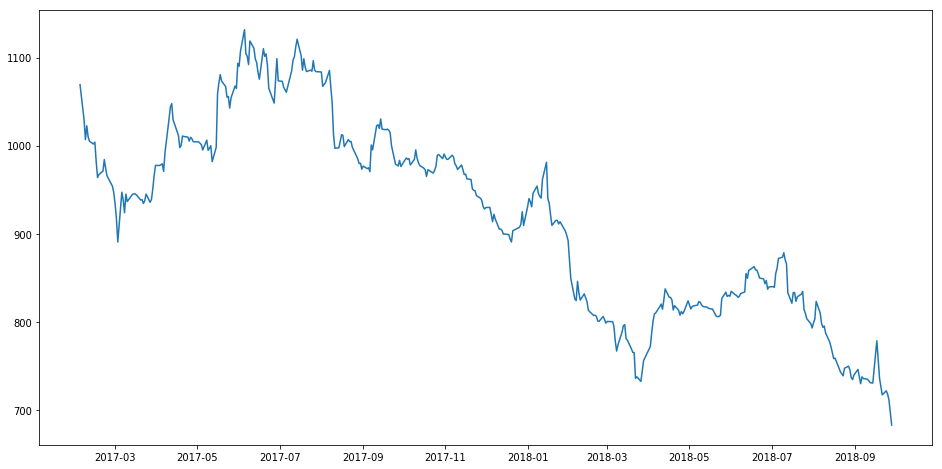

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [5]:
#splitting into train and validation
#train = new_data[:987]
#valid = new_data[987:]

train = new_data[:300]
valid = new_data[300:]

In [6]:
new_data.shape, train.shape, valid.shape

((410, 2), (300, 2), (110, 2))

In [7]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2017-02-03 00:00:00'),
 Timestamp('2018-04-20 00:00:00'),
 Timestamp('2018-04-23 00:00:00'),
 Timestamp('2018-09-28 00:00:00'))

In [8]:
#make predictions
preds = []
for i in range(0,110):
    a = train['Close'][len(train)-110+i:].sum() + sum(preds)
    b = a/110
    preds.append(b)

In [9]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

57.85625430427593

/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


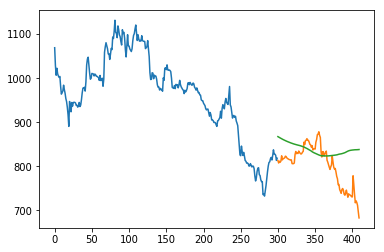

In [10]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

#### Inference
The RMSE value is close to 105 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

In the next section, we will look at two commonly used machine learning techniques – Linear Regression and kNN, and see how they perform on our stock market data.

# Linear Regression

In [11]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [12]:
new_data.head()

,Date,Close
0,2017-02-03 00:00:00,1069.2
1,2017-02-06 00:00:00,1029.2
2,2017-02-07 00:00:00,1006.8
3,2017-02-08 00:00:00,1022.6
4,2017-02-09 00:00:00,1010.05


In [13]:
# Switching from !pip install fastai to !pip install fastai==0.7.0 fixed the issue for me

#create features
from fastai.structured import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [14]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1069.2,2017,2,5,3,4,34,False,False,False,False,False,False
1,1029.2,2017,2,6,6,0,37,False,False,False,False,False,False
2,1006.8,2017,2,6,7,1,38,False,False,False,False,False,False
3,1022.6,2017,2,6,8,2,39,False,False,False,False,False,False
4,1010.05,2017,2,6,9,3,40,False,False,False,False,False,False


In [15]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
len(new_data)

410

In [17]:
#new_data

In [18]:
#split into train and validation
train = new_data[:300]
valid = new_data[300:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

39.984913832204555

/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


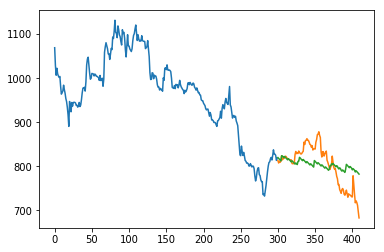

In [20]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[300:].index
train.index = new_data[:300].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# k-Nearest Neighbours

In [21]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [22]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

/home/jim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/jim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

199.65695415113666

/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


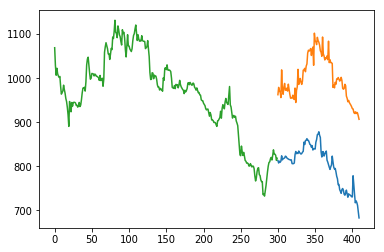

In [24]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

# Auto ARIMA
Introduction

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

p (past values used for forecasting the next value) q (past forecast errors used to predict the future values) d (order of differencing) Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. To read more about how auto ARIMA works, refer to this article:

In [29]:
from pyramid.arima import auto_arima

In [37]:
data = df.sort_index(ascending=True, axis=0)

train = data[:300]
valid = data[300:]

training = train['Close']
validation = valid['Close']

In [39]:
stepwise_model = auto_arima(training, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

AttributeError: module 'pyramid' has no attribute '__version__'

In [41]:
model = auto_arima(training, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                   d=1, D=1, trace=True, 
                   error_action='ignore',suppress_warnings=True)

AttributeError: module 'pyramid' has no attribute '__version__'

In [ ]:
model.fit(training)

In [ ]:

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [51]:
#https://github.com/tgsmith61591/pmdarima/blob/master/examples/quick_start_example.ipynb
import numpy as np
import pmdarima as pm

print('numpy version: %r' % np.__version__)
print('pmdarima version: %r' % pm.__version__)

numpy version: '1.16.2'
pmdarima version: '1.1.0'


In [47]:
# this is a dataset from R
wineind = np.array([
    # Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
    15136, 16733, 20016, 17708, 18019, 19227, 22893, 23739, 21133, 22591, 26786, 29740, 
    15028, 17977, 20008, 21354, 19498, 22125, 25817, 28779, 20960, 22254, 27392, 29945, 
    16933, 17892, 20533, 23569, 22417, 22084, 26580, 27454, 24081, 23451, 28991, 31386, 
    16896, 20045, 23471, 21747, 25621, 23859, 25500, 30998, 24475, 23145, 29701, 34365, 
    17556, 22077, 25702, 22214, 26886, 23191, 27831, 35406, 23195, 25110, 30009, 36242, 
    18450, 21845, 26488, 22394, 28057, 25451, 24872, 33424, 24052, 28449, 33533, 37351, 
    19969, 21701, 26249, 24493, 24603, 26485, 30723, 34569, 26689, 26157, 32064, 38870, 
    21337, 19419, 23166, 28286, 24570, 24001, 33151, 24878, 26804, 28967, 33311, 40226, 
    20504, 23060, 23562, 27562, 23940, 24584, 34303, 25517, 23494, 29095, 32903, 34379, 
    16991, 21109, 23740, 25552, 21752, 20294, 29009, 25500, 24166, 26960, 31222, 38641, 
    14672, 17543, 25453, 32683, 22449, 22316, 27595, 25451, 25421, 25288, 32568, 35110, 
    16052, 22146, 21198, 19543, 22084, 23816, 29961, 26773, 26635, 26972, 30207, 38687, 
    16974, 21697, 24179, 23757, 25013, 24019, 30345, 24488, 25156, 25650, 30923, 37240, 
    17466, 19463, 24352, 26805, 25236, 24735, 29356, 31234, 22724, 28496, 32857, 37198, 
    13652, 22784, 23565, 26323, 23779, 27549, 29660, 23356]
).astype(np.float64)

In [48]:
from pmdarima.arima import ARIMA

fit = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(y=wineind)

In [49]:
fit = ARIMA(order=(1, 1, 1), seasonal_order=None).fit(y=wineind)

In [50]:
# fitting a stepwise model:
from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(wineind, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.760, BIC=3082.229, Fit time=1.657 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3133.376, BIC=3139.564, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=3099.734, BIC=3112.109, Fit time=0.372 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3066.930, BIC=3079.305, Fit time=0.412 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3067.548, BIC=3086.110, Fit time=2.028 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=3088.088, BIC=3100.463, Fit time=0.218 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3068.000, BIC=3086.563, Fit time=1.678 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3068.915, BIC=3090.571, Fit time=4.052 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3067.447, BIC=3086.010, Fit time=0.847 seconds
Fit ARIMA: order=(1, 1, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood               -1527.371
Date:                            Thu, 07 Mar 2019   AIC                           3066.742
Time:                                    02:23:52   BIC                           3085.305
Sample:                                         0   HQIC                          3074.278
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -100.7331     72.197     -1.395      0.163    -242.236      40.770
ar.L1         -0.5123      0.390     -1.312      0.189      -1.277       0.253
ma.L1         -0.0806      0.404     -0.200      0.842      -0.872       0.711
ma.L2         -0.4430      0.224     -1.978      0.048      -0.882      -0.004
ma.S.L12      -0.4025      0.054     -7.448      0.000      -0.508      -0.297
sigma2      7.663e+06    7.3e+05     10.495      0.000    6.23e+06    9.09e+06
===================================================================================
Ljung-Box (Q):                       48.70   Jarque-Bera (JB):                21.57
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.14e+14. Standard errors may be unstable.
"""